In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as sts
from scipy import stats
import statistics
%matplotlib inline

1. Загрузить данные.

In [4]:
df = pd.read_csv('HR.csv')
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Посмотрела максимальные и минимальные значения по каждому показателю; 
получился значительный разброс в этих значениях по уровню удовлетворенности и по времени, проведенном в компании.
Это может свидетельствовать о том, что в данных могут быть выбросы, что нужно изучить отдельно, возможно есть ошибка в данных.

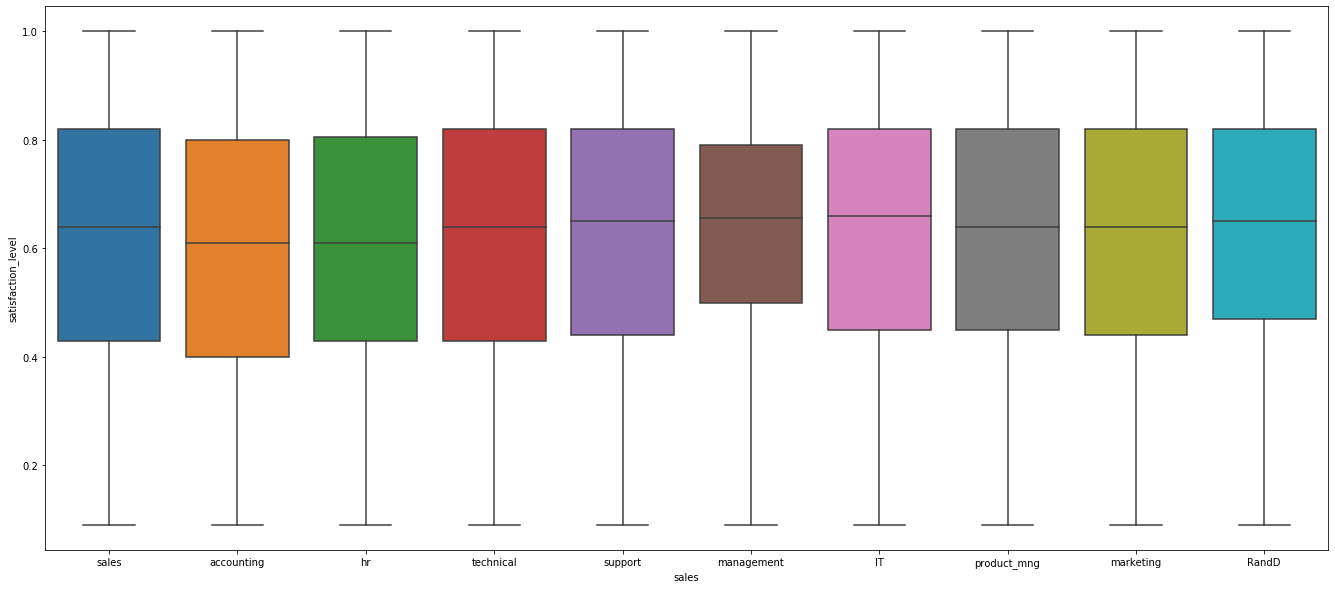

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = (23,10)
ax = sns.boxplot(x='sales', y='satisfaction_level', data=df)

График показывает минимальный и максимальный уровень удовлетворенности по каждому департаменту (усы ящика);
какое значение удовлетворенности превышало или было меньше в 50% случаев (медиана);
какое значение довлетворенности было в 25% случаев (верхний и нижний квартили);
Позволяет наглядно увидеть, что выбросов по показателю удовлетворенности не было, в целом показатель аналогичен по всем департаментам.

In [7]:
df.select_dtypes(include='object').mode()

,sales,salary
0,sales,low


In [8]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Рассчитала моду; получилось, что чаще всего в данной совокупности встречаются сотрудники с низким уровнем зарплаты
и уровнем удовлетворенность 0,1 что значительно ниже среднего уровня.
А вот наиболее часто встречающееся время работы в компании - 3 года, соответствует среднему показателю.

3. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [5]:
corr_matrix = df.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


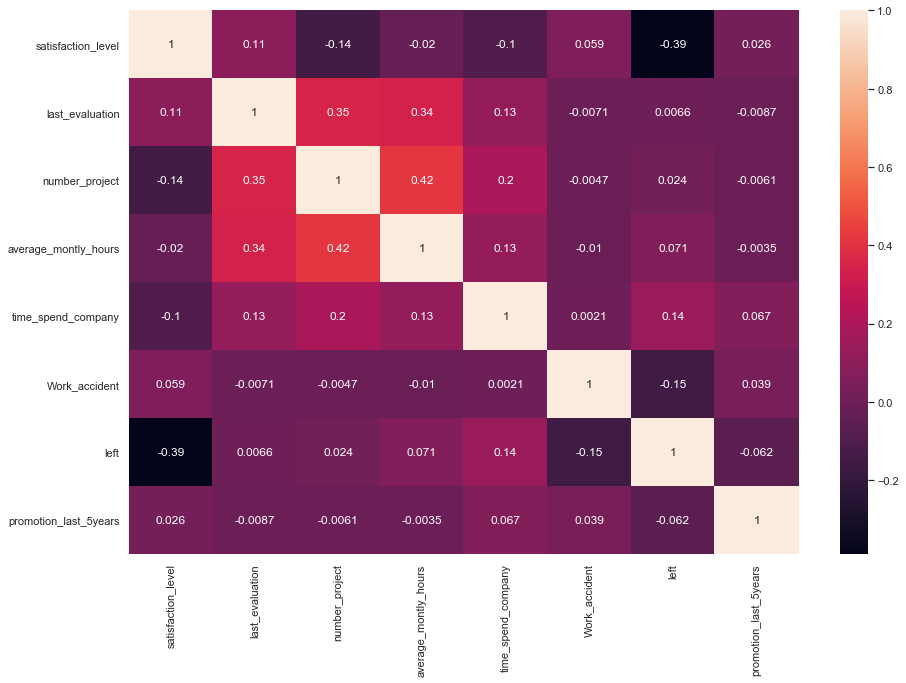

In [10]:
sns.set(rc=({'figure.figsize':(15, 10)}))
sns.heatmap(corr_matrix, annot=True, xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values)

Поскольку датасет небольшой, с помощью графика можно глазами определить взаимосвязь между переменными.
Например, что количество проектов у сотрудников коррелирует со среднемесячными рабочими часами.
Эти показатели можно будет не использовать в дальнейшем анализе.
Также посмотрела, как зависит время, проведенное в компании от всех других переменных.
Получилось, что наибольшая взаимосвязь с  количеством проектов в работе.

4. Визуализировать несколько взаимосвязей между переменными.

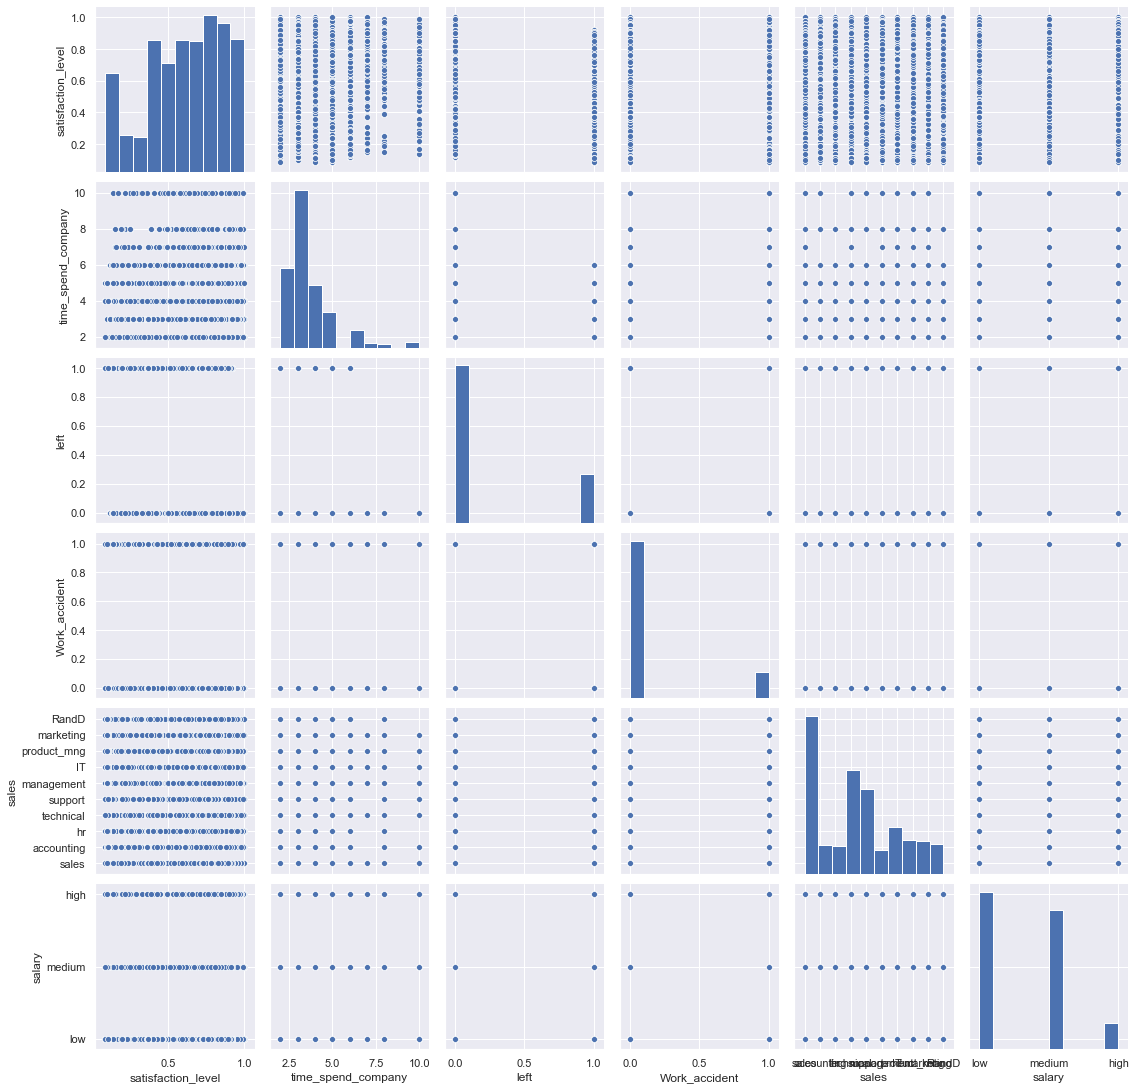

In [11]:
sns.pairplot(df, vars=['satisfaction_level', 'time_spend_company', 'left', 'Work_accident', 'sales', 'salary'], kind='scatter')

In [21]:
df_salary = df[['sales', 'salary', 'index']]
df_salary2 = df_salary.groupby(['sales', 'salary']).sum()
df_salary2

index
sales       salary       
IT          high       83
            low       609
            medium    535
RandD       high       51
            low       364
            medium    372
accounting  high       74
            low       358
            medium    335
hr          high       45
            low       335
            medium    359
management  high      225
            low       180
            medium    225
marketing   high       80
            low       402
            medium    376
product_mng high       68
            low       451
            medium    383
sales       high      269
            low      2099
            medium   1772
support     high      141
            low      1146
            medium    942
technical   high      201
            low      1372
            medium   1147

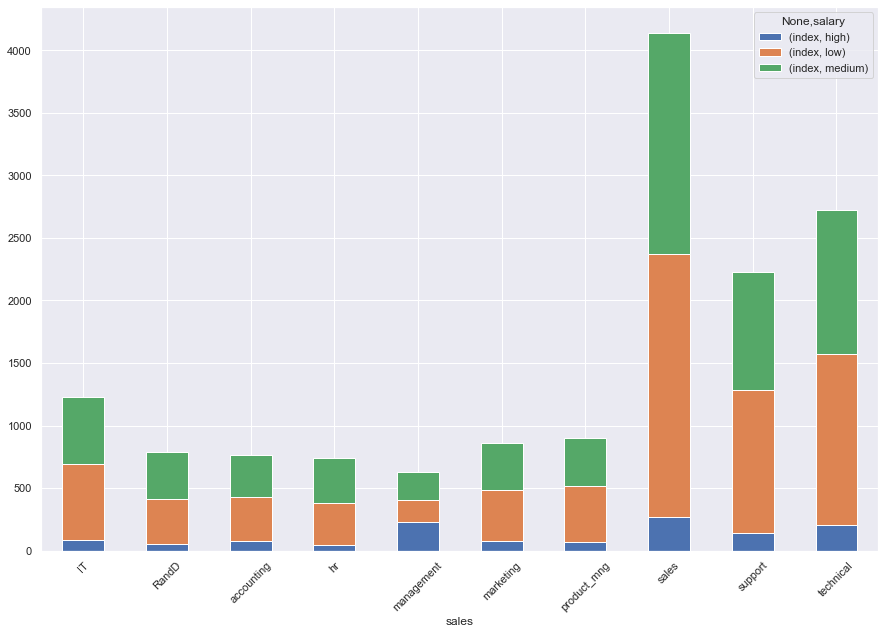

In [22]:
df_salary2.unstack('salary').plot(kind='bar', rot=45, stacked=True)

График наглядно показывает соотношение уровня зарплаты внутри каждого департамента. Очевидно, что наибольшее число сотрудников,
получающих высокую зарплату, относится к категории менеджмента (руководящим должностям);
в остальных департаментах число сотрудников со средней зарплатой в целом равно числу сотрудников с низкой зарплатой.

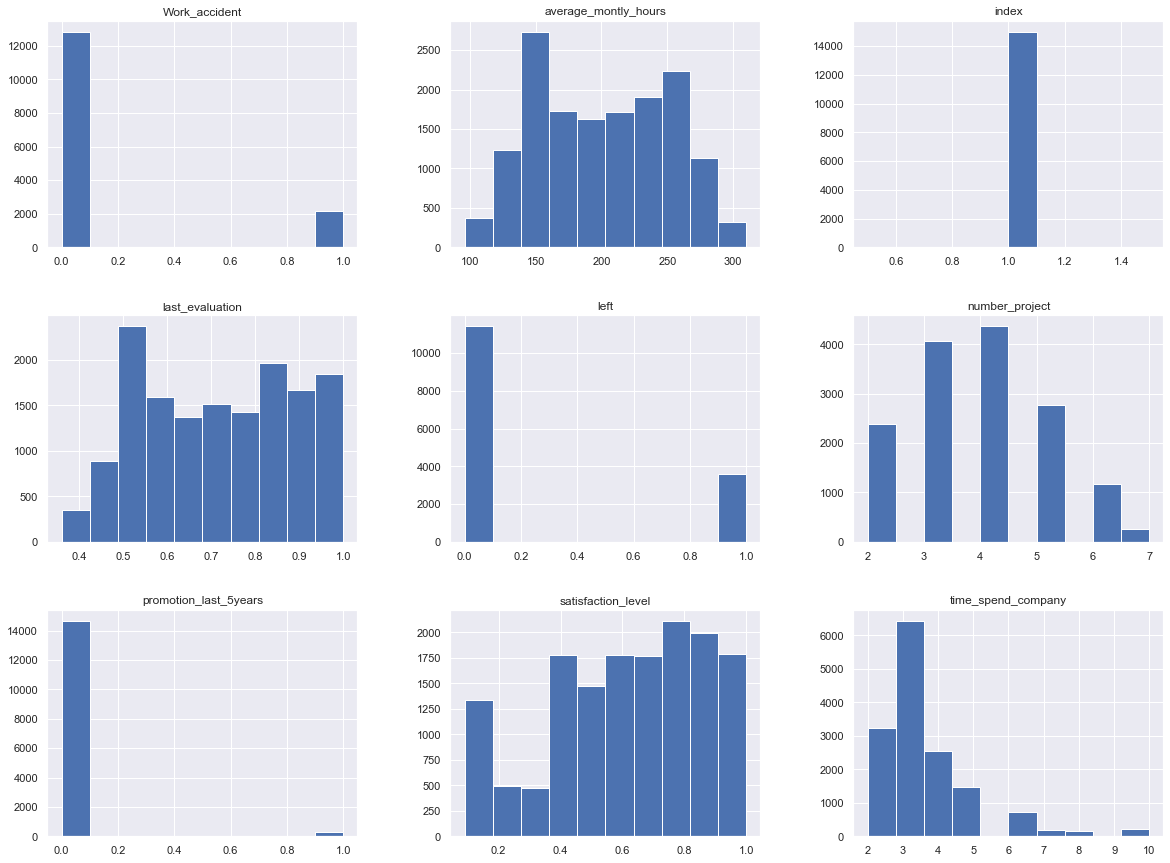

In [38]:
num_bins = 10 
df.hist(bins=num_bins, figsize=(20,15)) 
plt.savefig("df_histogram_plots") 
plt.show() 

Гистограмма построена по числовым данным в каждой категории переменных и помогает (также как и график pairplot) наглядно посмотреть как распределены значения переменных (симметрично, асимметрично, с наклоном и т.п.).
Например, что у большинства сотрудников максимальное время работы в компании составляет три года, и соответственно
потом идет тенденция к уходу из компании. Или что у основной массы сотрудников не было продвижений по карьере за последние 5 лет.

5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [14]:
stats.ttest_ind(df.time_spend_company, df.left)

Ttest_indResult(statistic=262.50803476202543, pvalue=0.0)

Исследую взаимосвязь между количеством времени, которое сотрудник проработал в компании, и количеством, покинувших компанию;
чтобы понять, например, проработавших дольше сотрудников нужно дополнительно мотивировать для продолжения работы в компании. p-value < 0.05, поэтому можно сказать что имеется статистическое различие между данными.

In [15]:
stats.ttest_ind(df.left, df.satisfaction_level)

Ttest_indResult(statistic=-93.06077566920372, pvalue=0.0)

Исследую взаимосвязь между уровнем удовлетворенности и количеством, покинувших компанию;
чтобы понять, насколько велик фактор удовлетворенности для сотрудников, решивших поменять работу.
p-value < 0.05, поэтому можно сказать что имеется статистическое различие между данными.

6. Рассчитать сколько работников работает в каждом департаменте.

In [16]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [17]:
df.groupby('sales').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
sales,,,,,,,,,
IT,1227,1227,1227,1227,1227,1227,1227,1227,1227
RandD,787,787,787,787,787,787,787,787,787
accounting,767,767,767,767,767,767,767,767,767
hr,739,739,739,739,739,739,739,739,739
management,630,630,630,630,630,630,630,630,630
marketing,858,858,858,858,858,858,858,858,858
product_mng,902,902,902,902,902,902,902,902,902
sales,4140,4140,4140,4140,4140,4140,4140,4140,4140
support,2229,2229,2229,2229,2229,2229,2229,2229,2229


Получаю общие данные по сотрудникам в каждом департаменте; в дальнейшем можно объединить данные “technical”, “support” and “IT”, как однотипные департаменты (в этом случае получится, что технических специалистов большинство).
Необходимо для анализа корректности распределения ресурсов в компании.

7. Показать распределение сотрудников по зарплатам.

In [18]:
new = df[['sales', 'salary']]
new.groupby('salary').count().reset_index()

,salary,sales
0,high,1237
1,low,7316
2,medium,6446


Получаю общие статистические данные об уровне зарплат в компании (у большинства сотрудников низкая зарплата);
в дальнейшем исследовании можно будет соотнести ее влияние на общую удовлетворенность и решение об уходе из компании.
Не хватает критериев - от каких сумм считались уровни зарплат, чтобы соотнести с рыночными зарплатами в регионе деятельности компании.

8. Показать распределение сотрудников по зарплатам совместно с департаментами.

In [19]:
df['index'] = 1
pd.pivot_table(df, values='index', index=['sales'], columns=['salary'], aggfunc=np.sum, fill_value=0)

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


Такое распределение наглядно дает понять уровни зарплат в различных департаментах, и если при дальнейшем исследовании выяснится, что зарплата является решающим фактором текучки кадров, можно будет проводить анализ по конкретным департаментам для решения вопроса о необходимости повысить зарплату для удержания сотрудников определенного департамента; соотносится ли уровень зарплат с сотрудниками других департаментов.

9. Сколько сотрудников покинули компанию.

In [34]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Получаю общие статистические данные о количестве покинувших компанию и оставшихся в компании;
чтобы в целом понимать картину по компании (количество продолживших работу в три раза превышает количество покинувших компанию, что уже неплохо; но в целом цифра покинувших все равно значительная и свидетельствует о текучке кадров (нужно выяснять за какой период получена цифра), также эти данные могут помочь в дальнейшем изучении,
например, выяснения процентного соотношения по отдельным департаментам.

10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

Гипотеза 1: Сотрудники покидают компанию из-за низкой зарплаты (salary).
Гипотеза 2: Сотрудники покидают компанию из-за большой нагрузки (average_montly_hours).
Гипотеза 3: Сотрудники покидают компанию из-за отсутствия продвижений (promotion_last_5years).

In [35]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,index
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,1.0
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,1.0


In [25]:
from scipy.stats import pearsonr

In [31]:
corr, p = pearsonr(df.average_montly_hours, df.left)
print(corr, p)

0.07128717878330107 2.3113035567508962e-18


In [32]:
corr, p = pearsonr(df.promotion_last_5years, df.left)
print(corr, p)

-0.061788106579203736 3.6240472241318145e-14


Значение коэффициента корреляции Пирсона составило 0.07 и -0.06, что соответствует слабой положительной связи и слабой отрицательной связи между большой нагрузкой, отсутствием продвижений и уходом сотрудников.
Данная корреляционная связь не является статистически значимой (p>0.05).

In [37]:
df.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,index
salary,,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205,1.0
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021,1.0
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079,1.0


Среднее число ушедших сотрудников с высокой зарплатой значительно ниже, чем с низкой и средней зарплатой.